In [1]:
import pandas as pd
import numpy as np
from data_encoding_utilities import encode_categorical_columns
import matplotlib.pyplot as plt
import seaborn as sns
import data_eda_utilities as eda

In [2]:
# load the final merged dataset
df = pd.read_csv('../Data/airline_delay_prices_age_storm.csv')

C:\Users\muthu\AppData\Local\Temp\ipykernel_27096\73940903.py:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/airline_delay_prices_age_storm.csv')


In [3]:
# describe the data metric properties
df.describe()

,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,...,DistanceGroup,mkt_fare,Unit Cost,Average Age,MAGNITUDE,CATEGORY,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT
count,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,...,1.917689e+06,1.917689e+06,1.525136e+06,1.525136e+06,1.917689e+06,0.0,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06
mean,1.365708e+03,1.373881e+03,1.450610e+01,1.669890e+01,2.328746e-01,1.494130e+03,1.472240e+03,1.409698e+01,1.930330e+01,2.716322e-01,...,2.370335e+00,1.389462e+02,7.690879e+01,1.542397e+01,3.312464e+01,NaN,2.548380e-02,8.628094e-03,1.054863e-02,4.355242e-03
std,4.869585e+02,5.058178e+02,4.557682e+01,4.467631e+01,4.226631e-01,5.017853e+02,5.357189e+02,4.963945e+01,4.705185e+01,4.448013e-01,...,1.021911e+00,7.619390e+01,6.407962e+00,5.020536e+00,1.959366e+01,NaN,6.869663e-01,5.507393e-01,1.502182e-01,8.135867e-02
min,8.000000e+00,1.000000e+00,-3.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-5.600000e+01,0.000000e+00,0.000000e+00,...,1.000000e+00,6.529000e+01,6.600000e+01,9.200000e+00,2.500000e-01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.390000e+02,9.410000e+02,-4.000000e+00,0.000000e+00,0.000000e+00,1.100000e+03,1.047000e+03,-9.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+00,7.762000e+01,7.400000e+01,1.170000e+01,3.633893e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.352000e+03,1.358000e+03,-1.000000e+00,0.000000e+00,0.000000e+00,1.515000e+03,1.509000e+03,-1.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+00,9.711000e+01,7.400000e+01,1.170000e+01,3.633893e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.800000e+03,1.814000e+03,1.200000e+01,1.200000e+01,0.000000e+00,1.920000e+03,1.922000e+03,1.700000e+01,1.700000e+01,1.000000e+00,...,3.000000e+00,1.949500e+02,7.500000e+01,2.274000e+01,4.800000e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.359000e+03,2.400000e+03,1.274000e+03,1.274000e+03,1.000000e+00,2.359000e+03,2.400000e+03,1.260000e+03,1.260000e+03,1.000000e+00,...,7.000000e+00,3.856100e+02,9.800000e+01,2.274000e+01,1.290000e+02,NaN,7.500000e+01,7.000000e+01,6.000000e+00,3.000000e+00


In [4]:
# check the datatypes of the columns
df.dtypes

FlightDate                      object
Reporting_Airline               object
IATA_CODE_Reporting_Airline     object
CRSDepTime                       int64
DepTime                        float64
DepDelay                       float64
DepDelayMinutes                float64
DepDel15                       float64
DepTimeBlk                      object
CRSArrTime                       int64
ArrTime                        float64
ArrDelay                       float64
ArrDelayMinutes                float64
ArrDel15                       float64
ArrTimeBlk                      object
CRSElapsedTime                 float64
ActualElapsedTime              float64
AirTime                        float64
Distance                       float64
DistanceGroup                    int64
OriginState                     object
DestState                       object
car                             object
city1                           object
city2                           object
mkt_fare                 

In [5]:
# find out whether Reporting_Airline and IATA_CODE_Reporting_Airline are same, if so drop one column
airline_to_iata = df.groupby('Reporting_Airline')['IATA_CODE_Reporting_Airline'].nunique()
iata_to_airline = df.groupby('IATA_CODE_Reporting_Airline')['Reporting_Airline'].nunique()

# Check if all counts are 1 (i.e., one-to-one relationship)
is_one_to_one = airline_to_iata.max() == 1 and iata_to_airline.max() == 1
print("Is one-to-one mapping:", is_one_to_one)
if is_one_to_one:
    df.drop(columns=['IATA_CODE_Reporting_Airline'], inplace=True)

Is one-to-one mapping: True


In [6]:
# find out whether Reporting_Airline and Reporting_Airline are same, if so drop one column
airline_to_car = df.groupby('Reporting_Airline')['Reporting_Airline'].nunique()
car_to_airline = df.groupby('car')['Reporting_Airline'].nunique()

# Check if all counts are 1 (i.e., one-to-one relationship)
is_one_to_one = airline_to_car.max() == 1 and car_to_airline.max() == 1

print("Is one-to-one mapping:", is_one_to_one)
if is_one_to_one:
    df.drop(columns=['car'], inplace=True)

Is one-to-one mapping: True


In [7]:
# find out whether OriginState and state1 are same, if so drop one column
OriginState_to_state1 = df.groupby('OriginState')['state1'].nunique()
state1_to_OriginState = df.groupby('state1')['OriginState'].nunique()

# Check if all counts are 1 (i.e., one-to-one relationship)
is_one_to_one = OriginState_to_state1.max() == 1 and state1_to_OriginState.max() == 1

print("Is one-to-one mapping:", is_one_to_one)
if is_one_to_one:
    df.drop(columns=['state1'], inplace=True)

Is one-to-one mapping: True


In [8]:
# find out whether DestState and state2 are same, if so drop one column
DestState_to_state2 = df.groupby('DestState')['state2'].nunique()
state2_to_DestState = df.groupby('state2')['DestState'].nunique()

# Check if all counts are 1 (i.e., one-to-one relationship)
is_one_to_one = DestState_to_state2.max() == 1 and state2_to_DestState.max() == 1

print("Is one-to-one mapping:", is_one_to_one)

if is_one_to_one:
    df.drop(columns=['state2'], inplace=True)

Is one-to-one mapping: True


In [9]:
# find out whether Reporting_Airline and IATA are same, if so drop one column
airline_to_IATA = df.groupby('Reporting_Airline')['IATA'].nunique()
IATA_to_airline = df.groupby('IATA')['Reporting_Airline'].nunique()

# Check if all counts are 1 (i.e., one-to-one relationship)
is_one_to_one = airline_to_IATA.max() == 1 and IATA_to_airline.max() == 1

print("Is one-to-one mapping:", is_one_to_one)

if is_one_to_one:
    df.drop(columns=['IATA'], inplace=True)

Is one-to-one mapping: True


In [10]:
# drop DATE column because FlightDate is already present
df.drop(columns=['DATE'], inplace=True)

In [11]:
# find out whether STATE and DestState are same, if so drop one column
state_to_DestState = df.groupby('STATE')['DestState'].nunique()
DestState_to_state = df.groupby('DestState')['STATE'].nunique()

# Check if all counts are 1 (i.e., one-to-one relationship)
is_one_to_one = state_to_DestState.max() == 1 and DestState_to_state.max() == 1

print("Is one-to-one mapping:", is_one_to_one)

if is_one_to_one:
    df.drop(columns=['STATE'], inplace=True)

Is one-to-one mapping: True


In [12]:
# renaming columns for better readability, dropping unncessary columns
df.rename(columns={'Reporting_Airline': 'Airline_Code'}, inplace=True)
df.rename(columns={'CRSDepTime': 'Scheduled_Dep_Time_hhmm'}, inplace=True)
df.rename(columns={'DepTime': 'Actual_Dep_Time_hhmm'}, inplace=True)
df.rename(columns={'DepDelay': 'Dep_Delay_min'}, inplace=True)
df.drop(columns=['DepDelayMinutes'], inplace=True) # same as DepDelay
df.rename(columns={'DepDel15': 'Is_Dep_Del_Over_15'}, inplace=True)
df.drop(columns=['DepTimeBlk'], inplace=True) # additional feature with same correlation
df.rename(columns={'CRSArrTime': 'Scheduled_Arr_Time_hhmm'}, inplace=True)
df.rename(columns={'ArrTime': 'Actual_Arr_Time_hhmm'}, inplace=True)
df.rename(columns={'ArrDelay': 'Arr_Delay_min'}, inplace=True)
df.drop(columns=['ArrDelayMinutes'], inplace=True) # same as ArrDelay
df.rename(columns={'ArrDel15': 'Is_Arr_Del_Over_15_min'}, inplace=True)
df.drop(columns=['ArrTimeBlk'], inplace=True) # additional feature with same correlation
df.rename(columns={'CRSElapsedTime': 'Scheduled_Elapsed_Time_min'}, inplace=True)
df.rename(columns={'ActualElapsedTime': 'Actual_Elapsed_Time_min'}, inplace=True)
df.rename(columns={'AirTime': 'AirTime_min'}, inplace=True)
df.rename(columns={'Distance': 'Distance_miles'}, inplace=True)
df.drop(columns=['DistanceGroup'], inplace=True) # additional feature with same correlation
df.rename(columns={'city1': 'Origin_City'}, inplace=True)
df.rename(columns={'city2': 'Dest_City'}, inplace=True)
df.rename(columns={'mkt_fare': 'Fare'}, inplace=True)
df.rename(columns={'Unit Cost': 'Airplane_Cost_millions'}, inplace=True)
df.rename(columns={'Average Age': 'Avg_Airline_Planes_Age'}, inplace=True)
df.rename(columns={'EVENT_TYPE': 'WEATHER_TYPE'}, inplace=True)
df.drop(columns=['MAGNITUDE_TYPE'], inplace=True) # irrelavant data
df.drop(columns=['CATEGORY'], inplace=True) # irrelavant data
df.rename(columns={'SOURCE': 'WEATHER_SOURCE'}, inplace=True)

In [13]:
df.head()

,FlightDate,Airline_Code,Scheduled_Dep_Time_hhmm,Actual_Dep_Time_hhmm,Dep_Delay_min,Is_Dep_Del_Over_15,Scheduled_Arr_Time_hhmm,Actual_Arr_Time_hhmm,Arr_Delay_min,Is_Arr_Del_Over_15_min,...,Avg_Airline_Planes_Age,WEATHER_TYPE,MAGNITUDE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,WEATHER_SOURCE
0,2016-01-06,AA,1410,1406.0,-4.0,0.0,1604,1552.0,-12.0,0.0,...,22.74,High Wind,36.00,0,0,0,0,0.00K,0.00K,ASOS
1,2016-01-06,AA,1410,1406.0,-4.0,0.0,1604,1552.0,-12.0,0.0,...,22.74,High Wind,56.00,0,0,0,0,0.00K,0.00K,RAWS
2,2016-01-08,AA,1410,1404.0,-6.0,0.0,1604,1550.0,-14.0,0.0,...,22.74,Hail,0.75,0,0,0,0,0.00K,0.00K,Public
3,2016-01-08,AA,1410,1404.0,-6.0,0.0,1604,1550.0,-14.0,0.0,...,22.74,Hail,1.00,0,0,0,0,0.00K,0.00K,Broadcast Media
4,2016-01-08,AA,1410,1404.0,-6.0,0.0,1604,1550.0,-14.0,0.0,...,22.74,Hail,1.00,0,0,0,0,0.00K,0.00K,Amateur Radio


In [14]:
# Sample: df['CRSDepTime'] is in HHMM format like 1410, 1604
def convert_to_hour(time_val):
    """Convert HHMM int to hour in 24h format."""
    hour = time_val // 100
    return hour % 24  # modulo 24 just in case of weird data

# Apply to create hour columns
df['Dep_Hour'] = df['Scheduled_Dep_Time_hhmm'].apply(convert_to_hour)
df['Arr_Hour'] = df['Scheduled_Arr_Time_hhmm'].apply(convert_to_hour)

# Function to map hours to time-of-day bins
def get_time_of_day(hour):
    if 5 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 16:
        return 'afternoon'
    elif 17 <= hour <= 20:
        return 'evening'
    else:
        return 'night'

# Create new binned features
df['DepTimeOfDay'] = df['Dep_Hour'].apply(get_time_of_day)
df['ArrTimeOfDay'] = df['Arr_Hour'].apply(get_time_of_day)

# drop columns after use
df.drop(columns=['Actual_Dep_Time_hhmm', 'Actual_Arr_Time_hhmm', 'Actual_Elapsed_Time_min', 'Scheduled_Dep_Time_hhmm', 'Scheduled_Arr_Time_hhmm'], inplace=True)

In [15]:
# convert damage columns to numeric
def convert_damage_column(series):
    """
    Converts damage strings like '1.25K', '3.5M', '0.00B' to float values.
    Returns a cleaned numeric pandas Series.
    """
    multipliers = {'K': 1e3, 'M': 1e6, 'B': 1e9}

    def convert(value):
        if isinstance(value, str) and value[-1] in multipliers:
            try:
                return float(value[:-1]) * multipliers[value[-1]]
            except:
                return 0.0
        try:
            return float(value)
        except:
            return 0.0

    return series.apply(convert)

damage_cols = ['DAMAGE_PROPERTY', 'DAMAGE_CROPS']

for col in damage_cols:
    df[col] = convert_damage_column(df[col])


In [16]:
# new features
# Combine direct and indirect injuries
df['Total_Injuries'] = df['INJURIES_DIRECT'] + df['INJURIES_INDIRECT']

# Combine direct and indirect deaths
df['Total_Deaths'] = df['DEATHS_DIRECT'] + df['DEATHS_INDIRECT']

# Combine property and crop damage
df['Total_Damage'] = df['DAMAGE_PROPERTY'] + df['DAMAGE_CROPS']

# drop unnecasry columns
df.drop(columns=['INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS'], inplace=True)


In [17]:
# new feature: create bins from distance column, to convert journey to short, medium or long
def distance_bin(miles):
    if miles <= 250:
        return 'short'
    elif miles <= 750:
        return 'medium'
    else:
        return 'long'

df['Distance_Bins_miles'] = df['Distance_miles'].apply(distance_bin)

In [18]:
# create dummy variables for distance bins
df['IsShortFlight'] = (df['Distance_Bins_miles'] == 'short').astype(int)
df['IsMediumFlight'] = (df['Distance_Bins_miles'] == 'medium').astype(int)
df['IsLongFlight'] = (df['Distance_Bins_miles'] == 'long').astype(int)

df.drop(columns=['Distance_Bins_miles'], inplace=True)

In [19]:
# create a feature that depends on both delay and distance
df['Delay_Distance_Interaction'] = df['Arr_Delay_min'] * df['Distance_miles']

In [20]:
# convert origin-destination combinations to categorical variables
df['Route'] = df['OriginState'] + '-' + df['DestState']

In [21]:
# new feature: Average departure delay per airline
avg_dep_delay_airline_min = df.groupby('Airline_Code')['Dep_Delay_min'].mean().reset_index(name='AvgDepDelay_min')

# new feature: Average arrival delay per airline
avg_arr_delay_airline_min = df.groupby('Airline_Code')['Arr_Delay_min'].mean().reset_index(name='AvgArrDelay_min')

In [22]:
# new feature: Average departure delay per route
avg_dep_delay_route_min = df.groupby('Route')['Dep_Delay_min'].mean().reset_index(name='AvgDepDelay_min')

# new feature: Average arrival delay per route
avg_arr_delay_route_min = df.groupby('Route')['Arr_Delay_min'].mean().reset_index(name='AvgArrDelay_min')

In [23]:
avg_dep_delay_airline_min.rename(columns={'AvgDepDelay_min': 'AvgDepDelayByAirline_min'}, inplace=True)
avg_dep_delay_route_min.rename(columns={'AvgDepDelay_min': 'AvgDepDelayByRoute_min'}, inplace=True)

In [24]:
# Merge airline average back to original DataFrame
df = df.merge(avg_dep_delay_airline_min, on='Airline_Code', how='left')

# Merge route average back to original DataFrame
df = df.merge(avg_dep_delay_route_min, on='Route', how='left')

In [25]:
# new feature: create RouteTraffic from Route and FlightDate
df['RouteTraffic'] = df.groupby(['Route', 'FlightDate'])['FlightDate'].transform('count')

In [26]:
# new feature: find day of week from FlightDate
df['FlightDate'] = pd.to_datetime(df['FlightDate'], format='%Y-%m-%d')

df['DayOfWeek'] = df['FlightDate'].dt.dayofweek

In [ ]:
# new feature: find categorical weather from weather data
weather_agg = df.groupby(['DestState', 'FlightDate']).agg(
    WeatherEventCount=('WEATHER_TYPE', 'count'),
    # Flag severe weather: 1 if any weather event on that day in that state had MAGNITUDE > 5, else 0.
    SevereWeatherFlag=('MAGNITUDE', lambda x: 1 if (x > 5).any() else 0)
).reset_index()

weather_agg.rename(columns={'WeatherEventCount': 'WeatherEventCountByState'}, inplace=True)

df = df.merge(weather_agg[['DestState', 'FlightDate', 'WeatherEventCountByState', 'SevereWeatherFlag']],
              left_on=['DestState', 'FlightDate'],
              right_on=['DestState', 'FlightDate'],
              how='left')

# drop unnecasary columns, WEATHER_SOURCE is irrelavant
df.drop(columns=['MAGNITUDE', 'WEATHER_TYPE', 'WEATHER_SOURCE', 'WeatherEventCountByState'], inplace=True)

In [28]:
# drop unnecessary columns
# date will never repeat, hence deleting date columns
df.drop(columns=['FlightDate'], inplace=True)

In [29]:
df.dtypes

Airline_Code                   object
Dep_Delay_min                 float64
Is_Dep_Del_Over_15            float64
Arr_Delay_min                 float64
Is_Arr_Del_Over_15_min        float64
Scheduled_Elapsed_Time_min    float64
AirTime_min                   float64
Distance_miles                float64
OriginState                    object
DestState                      object
Origin_City                    object
Dest_City                      object
Fare                          float64
Airplane_Cost_millions        float64
Avg_Airline_Planes_Age        float64
Dep_Hour                        int64
Arr_Hour                        int64
DepTimeOfDay                   object
ArrTimeOfDay                   object
Total_Injuries                  int64
Total_Deaths                    int64
Total_Damage                  float64
IsShortFlight                   int64
IsMediumFlight                  int64
IsLongFlight                    int64
Delay_Distance_Interaction    float64
Route       

In [30]:
# Create a replica of the cleaned DataFrame
df_model = df.copy()

# Set the target variable
target_col = 'Is_Arr_Del_Over_15_min'
y = df_model[target_col]

# Drop the target and leakage-prone columns from the feature set
X = df_model.drop(columns=[target_col, 'Arr_Delay_min'])


In [31]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns to encode:", categorical_cols)

# Encode categorical columns
X_encoded = encode_categorical_columns(X, categorical_cols)

Categorical columns to encode: ['Airline_Code', 'OriginState', 'DestState', 'Origin_City', 'Dest_City', 'DepTimeOfDay', 'ArrTimeOfDay', 'Route']


In [32]:
# Compute correlation matrix
def corr_analysis(df, plot=False):
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with correlation > 0.85
    high_corr_pairs = [(col, row, upper_tri.loc[row, col])
                    for col in upper_tri.columns
                    for row in upper_tri.index
                    if upper_tri.loc[row, col] > 0.85]

    # Print correlated pairs
    print("Highly correlated feature pairs (corr > 0.85):")
    for a, b, val in sorted(high_corr_pairs, key=lambda x: -x[2]):
        print(f"{a} <-> {b}: {val:.2f}")

    if plot:
        # Plot heatmap
        plt.figure(figsize=(14, 10))
        sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
        plt.title("Correlation Matrix")
        plt.show()

# perform correlation analsisy
corr_analysis(X_encoded, plot=False)

Highly correlated feature pairs (corr > 0.85):
Route <-> OriginState: 0.99
Distance_miles <-> Scheduled_Elapsed_Time_min: 0.95
Distance_miles <-> AirTime_min: 0.94
AirTime_min <-> Scheduled_Elapsed_Time_min: 0.94
Avg_Airline_Planes_Age <-> Airline_Code: 0.93
Arr_Hour <-> Dep_Hour: 0.87
Delay_Distance_Interaction <-> Dep_Delay_min: 0.85


In [33]:
# dropping columns based on above correlation analysis
# Redundant; OriginState + DestState already encode route logic.
X_encoded.drop(columns=['Route'], inplace=True)
# Distance is more fundamental and less derived. Elapsed time is airline-specific.
X_encoded.drop(columns=['Scheduled_Elapsed_Time_min'], inplace=True)
# AirTime includes real-time delays or air traffic adjustments. Not always known in advance.
X_encoded.drop(columns=['AirTime_min'], inplace=True)

Highly correlated feature pairs (corr > 0.85):
Avg_Airline_Planes_Age <-> Airline_Code: 0.93
Arr_Hour <-> Dep_Hour: 0.87
Delay_Distance_Interaction <-> Dep_Delay_min: 0.85


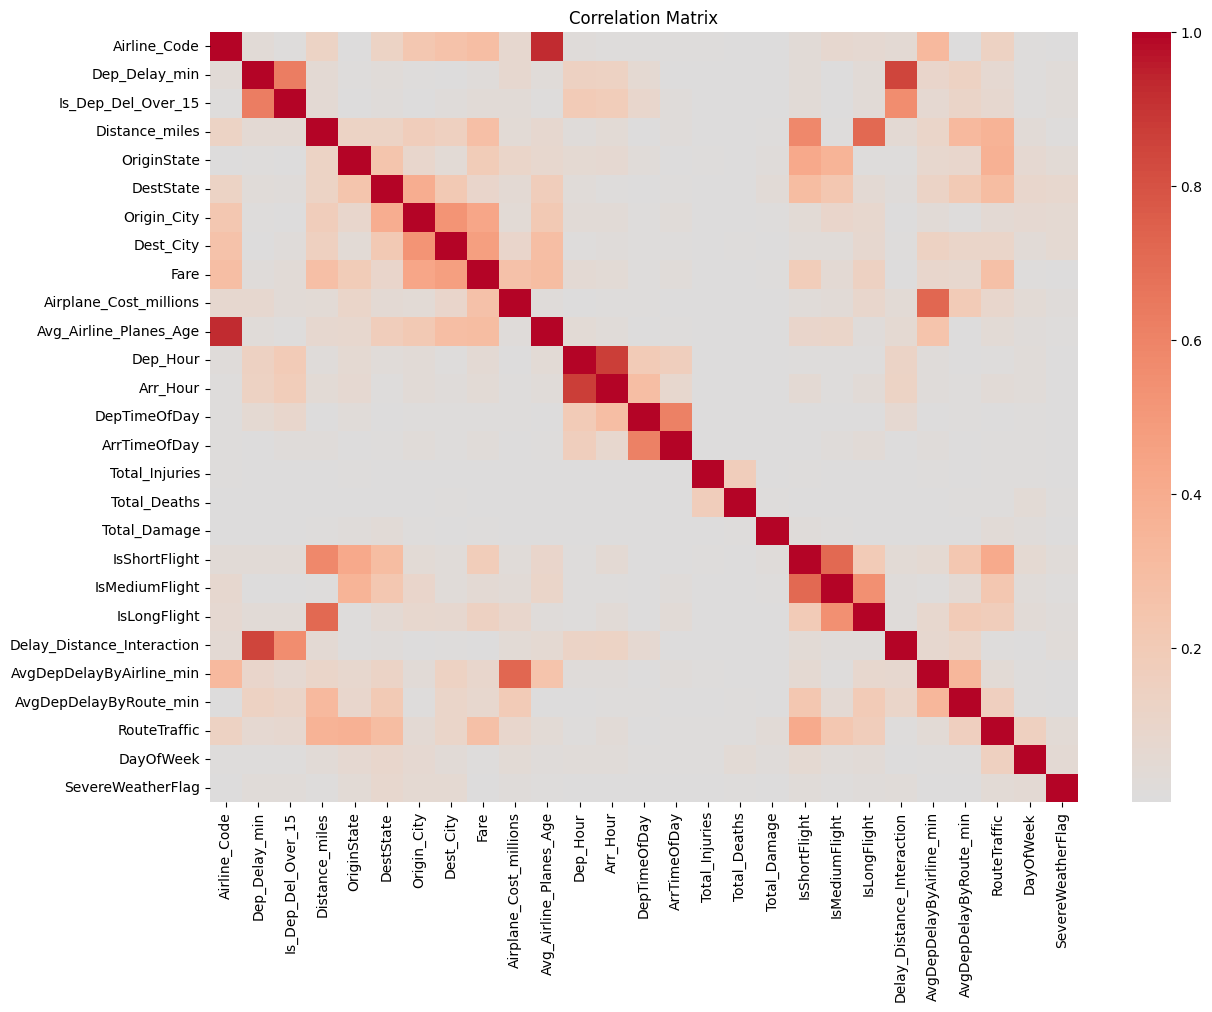

In [34]:
# repeate correlation analysis, and plot heatmap
corr_analysis(X_encoded, plot=True)

In [35]:
# Check for any NaNs before PCA analysis
nan_summary = X_encoded.isnull().sum()
print(nan_summary[nan_summary > 0])
print(len(X_encoded))

Airplane_Cost_millions    392553
Avg_Airline_Planes_Age    392553
Total_Damage              385269
dtype: int64
1917689


In [36]:
# fill Nan with mean
X_encoded.fillna(X_encoded.mean(), inplace=True)

In [37]:
# Standardization and PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 2: Apply PCA to retain 95% of explained variance
pca = PCA(n_components=0.75, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA retained {pca.n_components_} components to preserve 75% variance.")


PCA retained 12 components to preserve 75% variance.


In [38]:
from sklearn.model_selection import train_test_split

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.4, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1150613, 12)
Test shape: (767076, 12)


In [39]:
# Train data on 3 ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# ----- Model 1: Logistic Regression -----
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\n")

# ----- Model 2: Random Forest Classifier -----
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n")

# # ----- Model 3: Support Vector Machine (SVM) -----
# svm = SVC(random_state=42)
# svm.fit(X_train, y_train)
# y_pred_svm = svm.predict(X_test)

# print("SVM Results:")
# print("Accuracy:", accuracy_score(y_test, y_pred_svm))
# print(classification_report(y_test, y_pred_svm))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# SVM takes hours to run, hence using XGBOOST

# Initialize and train XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate model performance
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Logistic Regression Results:
Accuracy: 0.9104169599883193
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94    558713
         1.0       0.88      0.77      0.82    208363

    accuracy                           0.91    767076
   macro avg       0.90      0.87      0.88    767076
weighted avg       0.91      0.91      0.91    767076

Confusion Matrix:
 [[537804  20909]
 [ 47808 160555]]


Random Forest Results:
Accuracy: 0.997654730430883
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    558713
         1.0       1.00      0.99      1.00    208363

    accuracy                           1.00    767076
   macro avg       1.00      1.00      1.00    767076
weighted avg       1.00      1.00      1.00    767076

Confusion Matrix:
 [[558074    639]
 [  1160 207203]]




d:\florida_coursework\second_sem\intro_to_data_science\ids_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:36:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:
Accuracy: 0.9647088424093571
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98    558713
         1.0       0.95      0.92      0.93    208363

    accuracy                           0.96    767076
   macro avg       0.96      0.95      0.95    767076
weighted avg       0.96      0.96      0.96    767076

Confusion Matrix:
 [[549185   9528]
 [ 17543 190820]]


In [40]:
# # ----- Model 3: Support Vector Machine (SVM) -----
# svm = SVC(random_state=42)
# svm.fit(X_train, y_train)
# y_pred_svm = svm.predict(X_test)

# print("SVM Results:")
# print("Accuracy:", accuracy_score(y_test, y_pred_svm))
# print(classification_report(y_test, y_pred_svm))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

F1-Score Comparison (class 1.0 - delays):
Logistic Regression: 0.8237
Random Forest:       0.9957
XGBoost:             0.9338


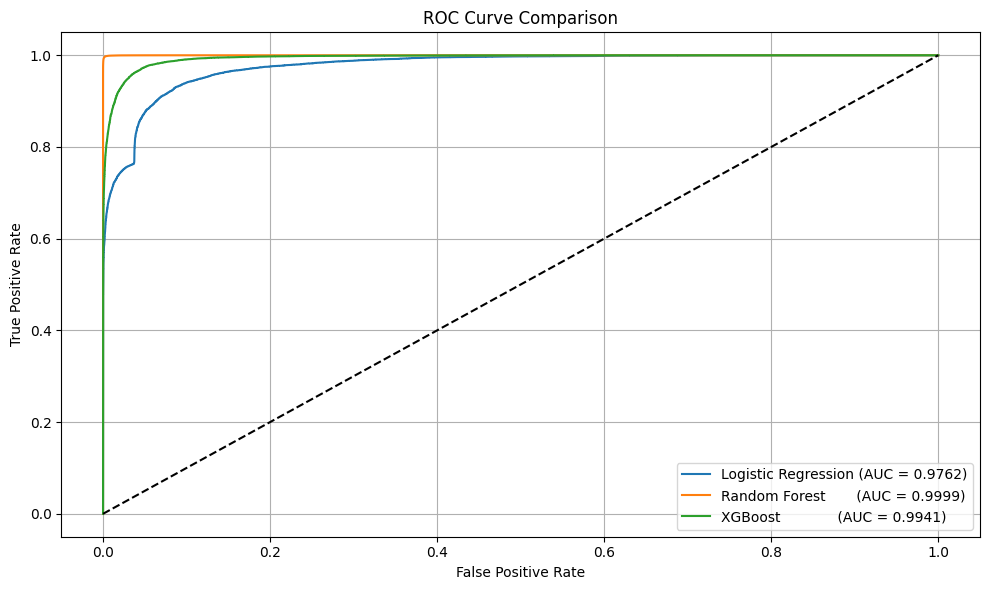

In [41]:
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# ----- F1-Scores for class 1.0 -----
f1_lr = f1_score(y_test, y_pred_lr, pos_label=1)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)
f1_xgb = f1_score(y_test, y_pred_xgb, pos_label=1)

print("F1-Score Comparison (class 1.0 - delays):")
print(f"Logistic Regression: {f1_lr:.4f}")
print(f"Random Forest:       {f1_rf:.4f}")
print(f"XGBoost:             {f1_xgb:.4f}")

# ----- ROC Curve Plot -----
# Get prediction probabilities
y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot all ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.4f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest       (AUC = {auc_rf:.4f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost             (AUC = {auc_xgb:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
df.columns

Index(['Airline_Code', 'Dep_Delay_min', 'Is_Dep_Del_Over_15', 'Arr_Delay_min',
       'Is_Arr_Del_Over_15_min', 'Scheduled_Elapsed_Time_min', 'AirTime_min',
       'Distance_miles', 'OriginState', 'DestState', 'Origin_City',
       'Dest_City', 'Fare', 'Airplane_Cost_millions', 'Avg_Airline_Planes_Age',
       'Dep_Hour', 'Arr_Hour', 'DepTimeOfDay', 'ArrTimeOfDay',
       'Total_Injuries', 'Total_Deaths', 'Total_Damage', 'IsShortFlight',
       'IsMediumFlight', 'IsLongFlight', 'Delay_Distance_Interaction', 'Route',
       'AvgDepDelayByAirline_min', 'AvgDepDelayByRoute_min', 'RouteTraffic',
       'DayOfWeek', 'SevereWeatherFlag'],
      dtype='object')

In [43]:
feature_df = df[['Avg_Airline_Planes_Age','Total_Injuries','Total_Deaths','Total_Damage','AvgDepDelayByAirline_min','AvgDepDelayByRoute_min','Route','RouteTraffic','SevereWeatherFlag','Delay_Distance_Interaction', 'IsShortFlight', 'IsMediumFlight', 'IsLongFlight']]

In [44]:
feature_df.describe()

,Avg_Airline_Planes_Age,Total_Injuries,Total_Deaths,Total_Damage,AvgDepDelayByAirline_min,AvgDepDelayByRoute_min,RouteTraffic,SevereWeatherFlag,Delay_Distance_Interaction,IsShortFlight,IsMediumFlight,IsLongFlight
count,1.525136e+06,1.917689e+06,1.917689e+06,1.532420e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06
mean,1.542397e+01,3.411189e-02,1.490388e-02,1.068657e+06,1.450610e+01,1.450610e+01,5.008912e+03,9.811273e-01,6.078486e+03,2.074956e-01,6.616245e-01,1.308799e-01
std,5.020536e+00,8.840766e-01,1.705663e-01,2.568875e+07,4.433106e+00,6.341499e+00,7.565685e+03,1.360755e-01,2.475040e+04,4.055136e-01,4.731571e-01,3.372691e-01
min,9.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.685197e+00,-7.000000e+00,1.000000e+00,0.000000e+00,-5.747000e+04,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.170000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.249337e+01,1.073963e+01,5.130000e+02,1.000000e+00,-3.743000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.170000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.401727e+01,1.435763e+01,1.665000e+03,1.000000e+00,-2.390000e+02,0.000000e+00,1.000000e+00,0.000000e+00
75%,2.274000e+01,0.000000e+00,0.000000e+00,1.000000e+03,1.676616e+01,1.709899e+01,5.110000e+03,1.000000e+00,7.150000e+03,0.000000e+00,1.000000e+00,0.000000e+00
max,2.274000e+01,7.500000e+01,6.000000e+00,1.360000e+09,3.615642e+01,2.413102e+02,3.364000e+04,1.000000e+00,8.507800e+05,1.000000e+00,1.000000e+00,1.000000e+00


In [45]:
feature_df.dtypes

Avg_Airline_Planes_Age        float64
Total_Injuries                  int64
Total_Deaths                    int64
Total_Damage                  float64
AvgDepDelayByAirline_min      float64
AvgDepDelayByRoute_min        float64
Route                          object
RouteTraffic                    int64
SevereWeatherFlag               int64
Delay_Distance_Interaction    float64
IsShortFlight                   int64
IsMediumFlight                  int64
IsLongFlight                    int64
dtype: object

In [46]:
df.dtypes

Airline_Code                   object
Dep_Delay_min                 float64
Is_Dep_Del_Over_15            float64
Arr_Delay_min                 float64
Is_Arr_Del_Over_15_min        float64
Scheduled_Elapsed_Time_min    float64
AirTime_min                   float64
Distance_miles                float64
OriginState                    object
DestState                      object
Origin_City                    object
Dest_City                      object
Fare                          float64
Airplane_Cost_millions        float64
Avg_Airline_Planes_Age        float64
Dep_Hour                        int64
Arr_Hour                        int64
DepTimeOfDay                   object
ArrTimeOfDay                   object
Total_Injuries                  int64
Total_Deaths                    int64
Total_Damage                  float64
IsShortFlight                   int64
IsMediumFlight                  int64
IsLongFlight                    int64
Delay_Distance_Interaction    float64
Route       

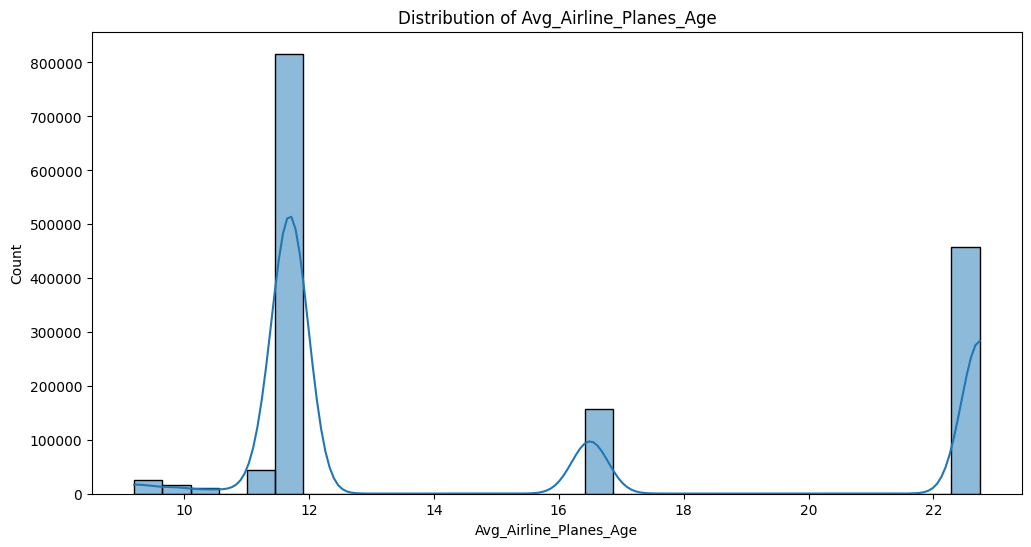

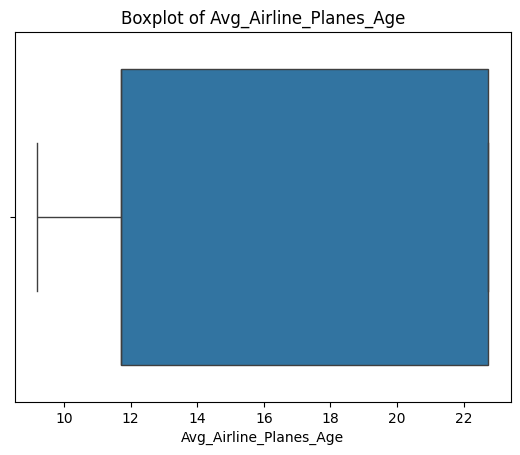

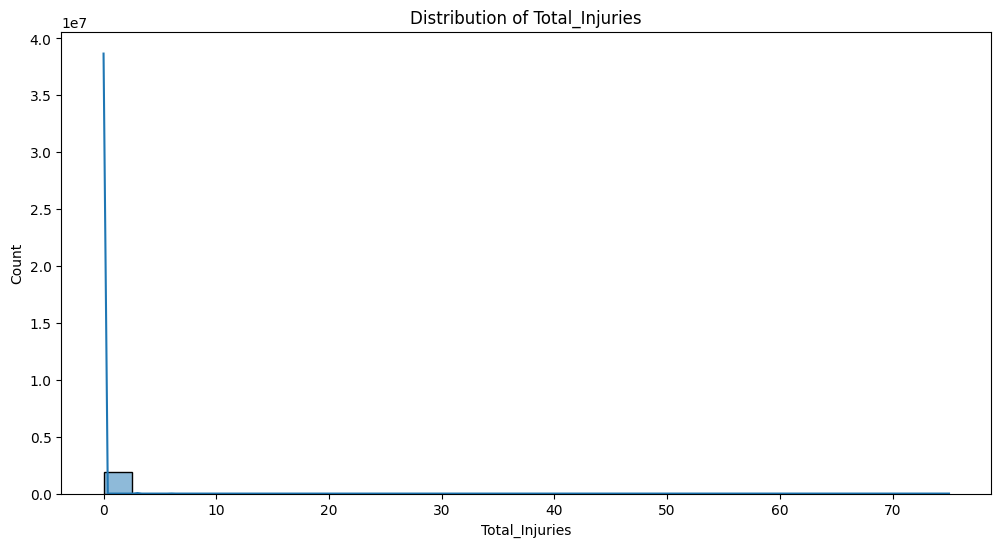

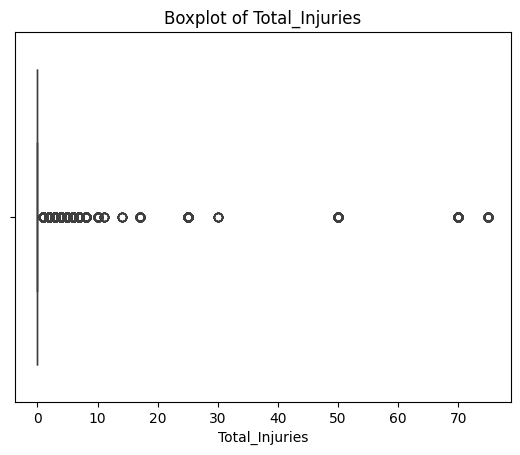

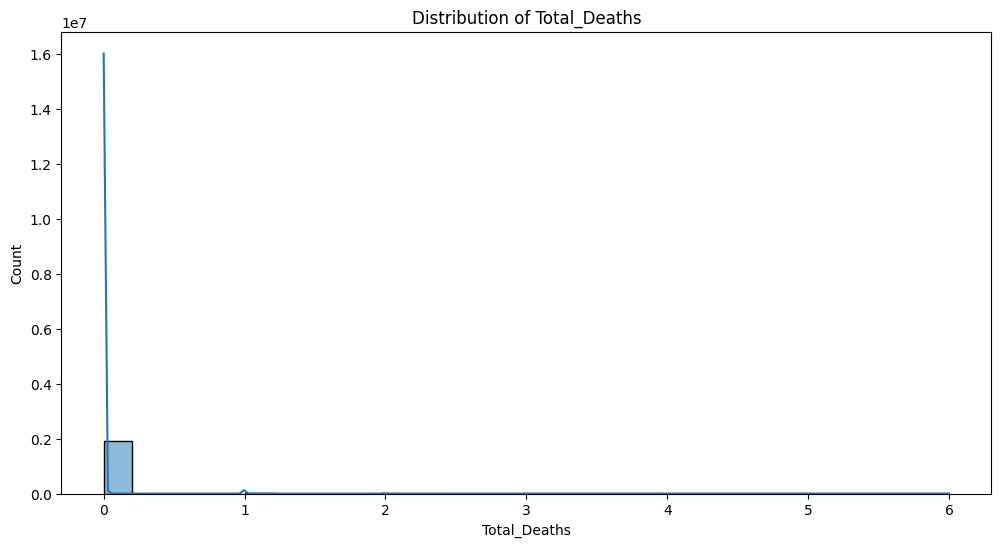

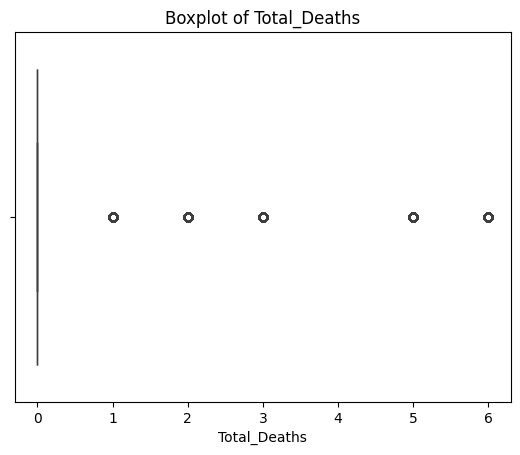

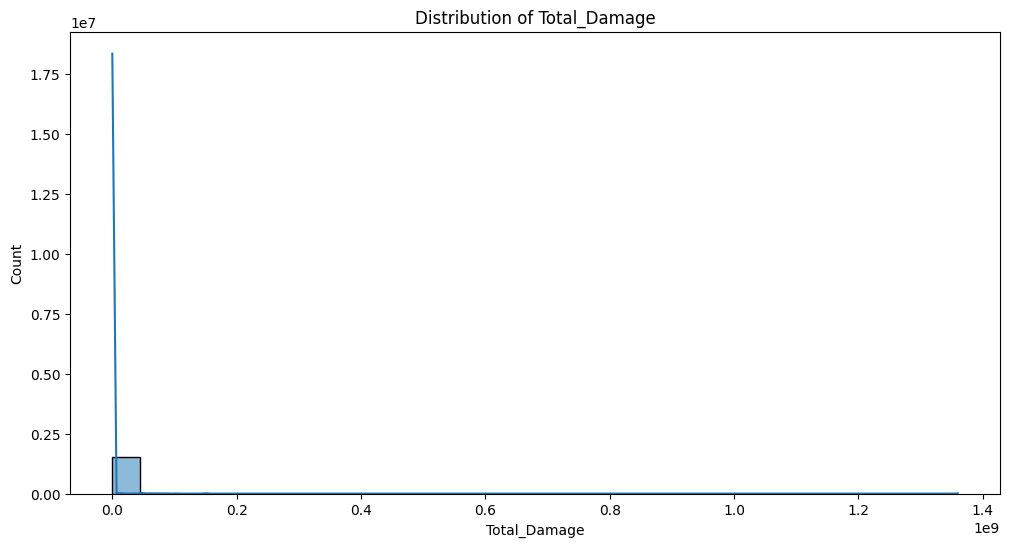

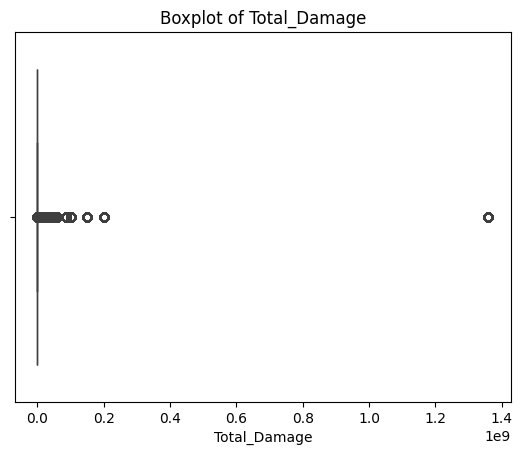

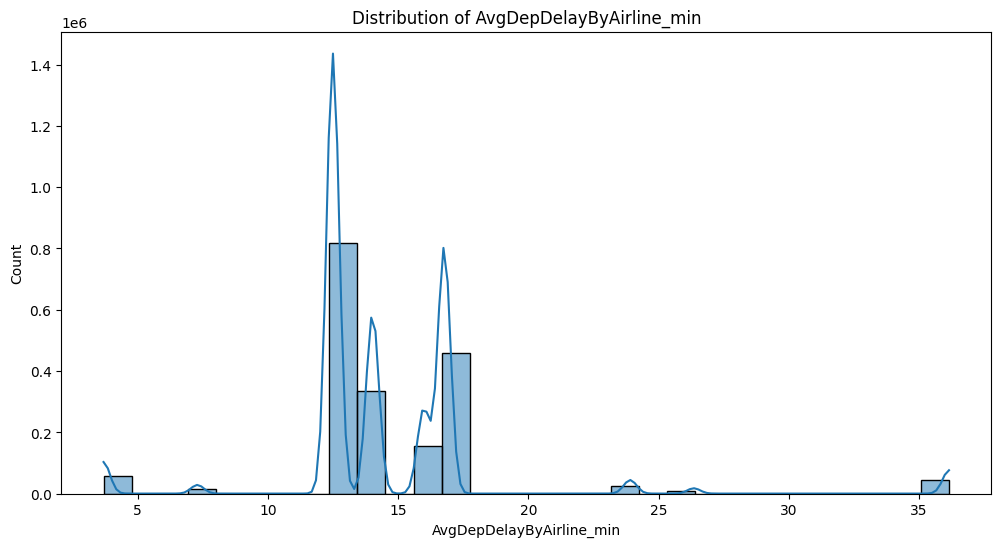

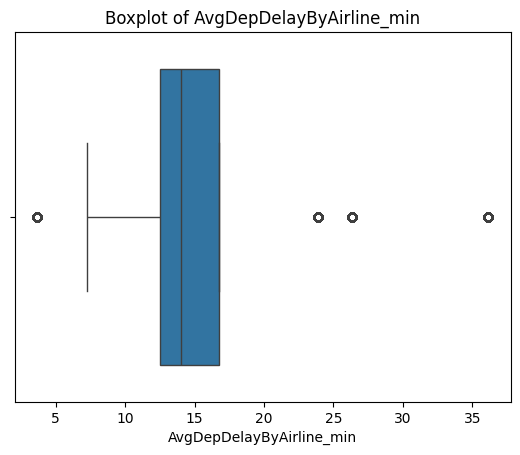

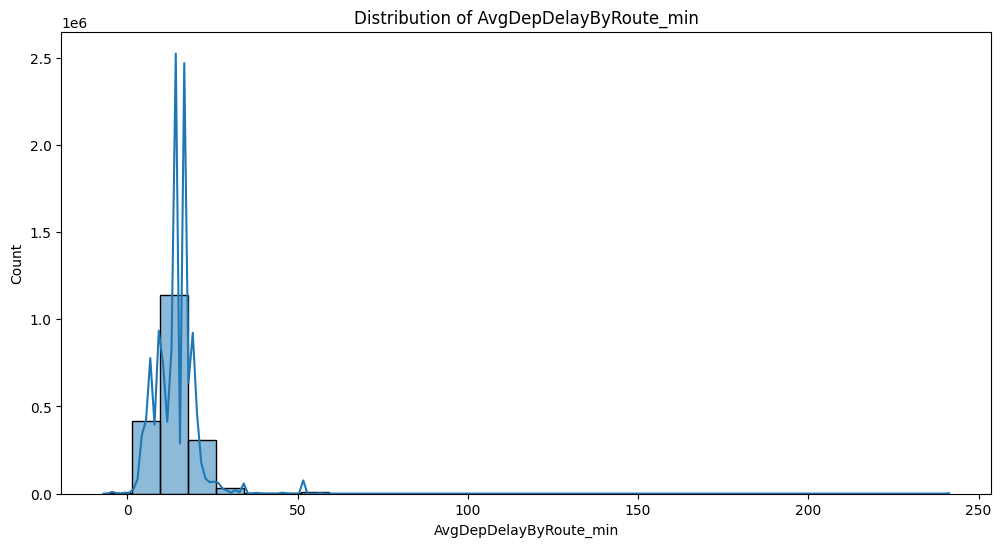

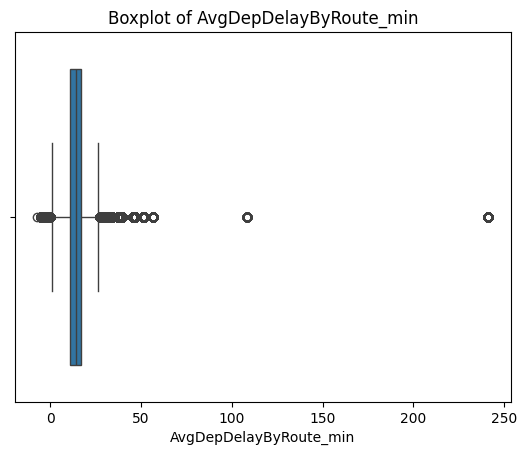

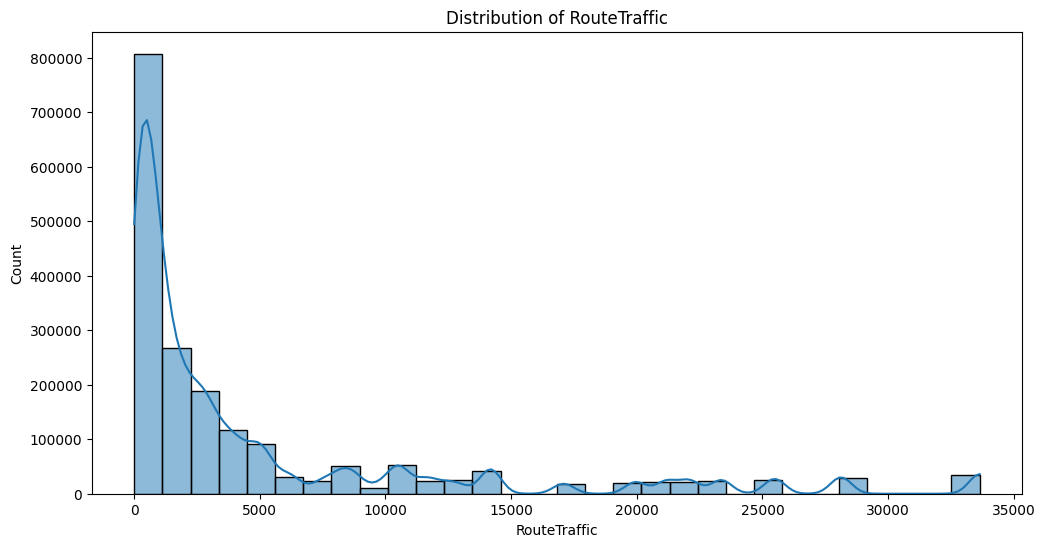

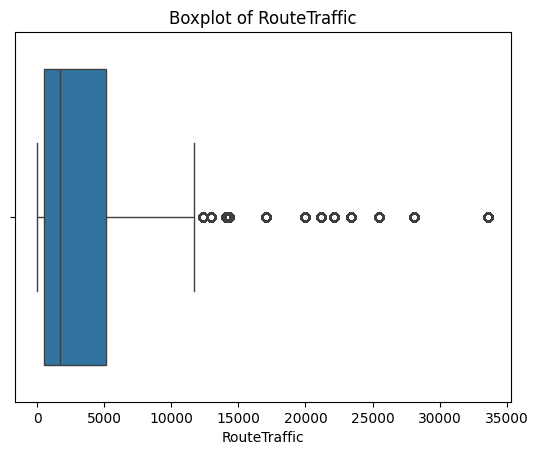

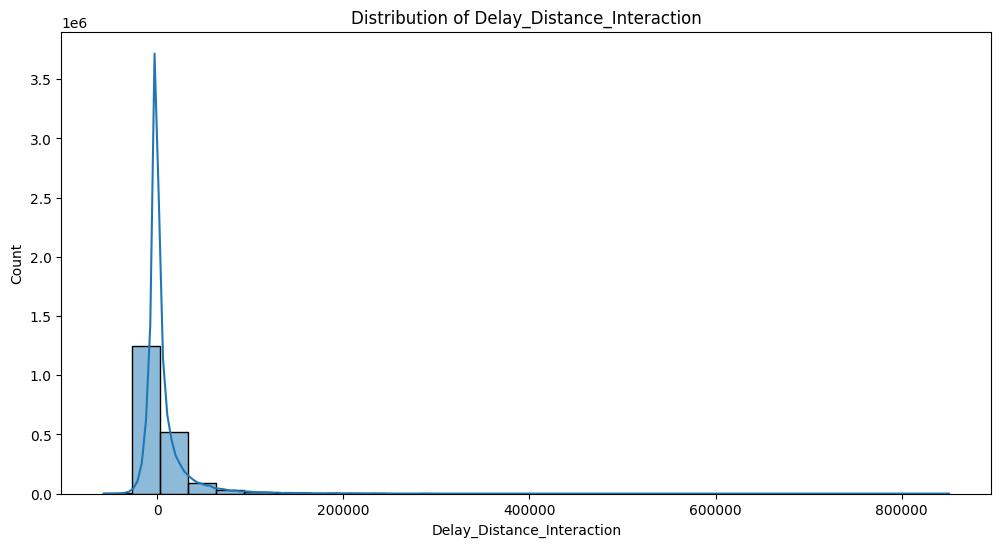

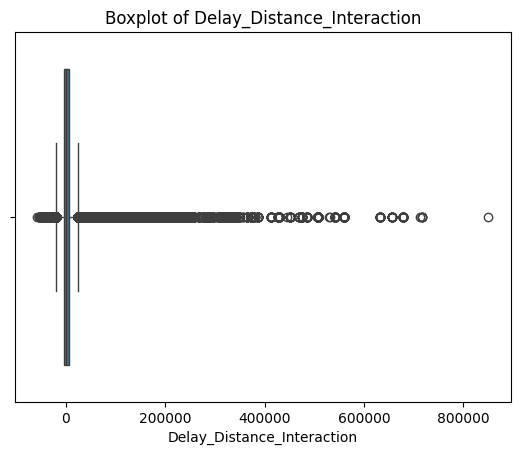

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to visualize distributions
def plot_numerical_distribution(df, features):
    for feature in features:
        plt.figure(figsize=(12, 6))
        # Histogram for distribution
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f'Distribution of {feature}')
        plt.show()

        # Boxplot for outliers detection
        sns.boxplot(x=df[feature])
        plt.title(f'Boxplot of {feature}')
        plt.show()

# List of numerical features
numerical_features = [
    'Avg_Airline_Planes_Age', 'Total_Injuries', 'Total_Deaths', 'Total_Damage', 
    'AvgDepDelayByAirline_min', 'AvgDepDelayByRoute_min', 'RouteTraffic', 
    'Delay_Distance_Interaction'
]

plot_numerical_distribution(df, numerical_features)


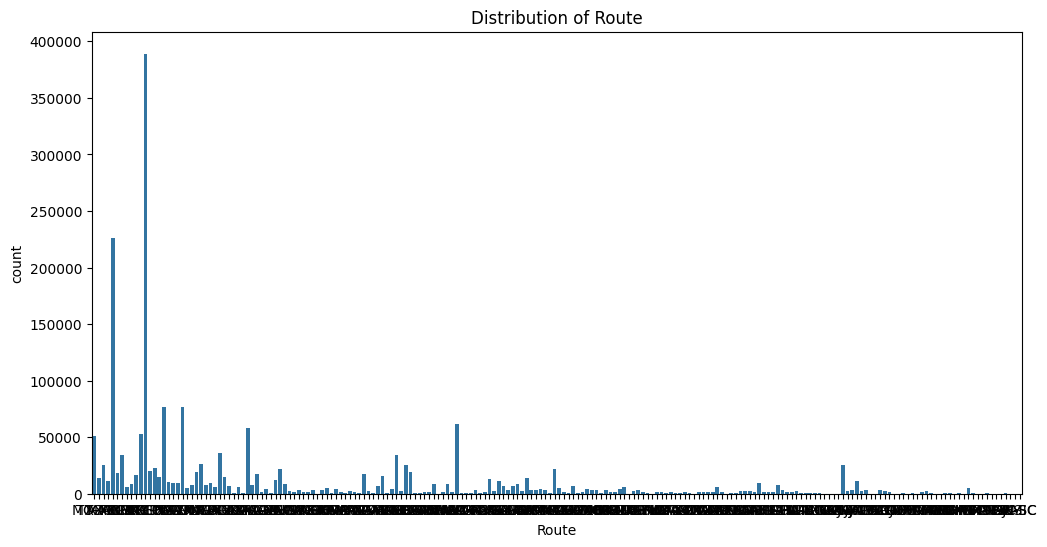

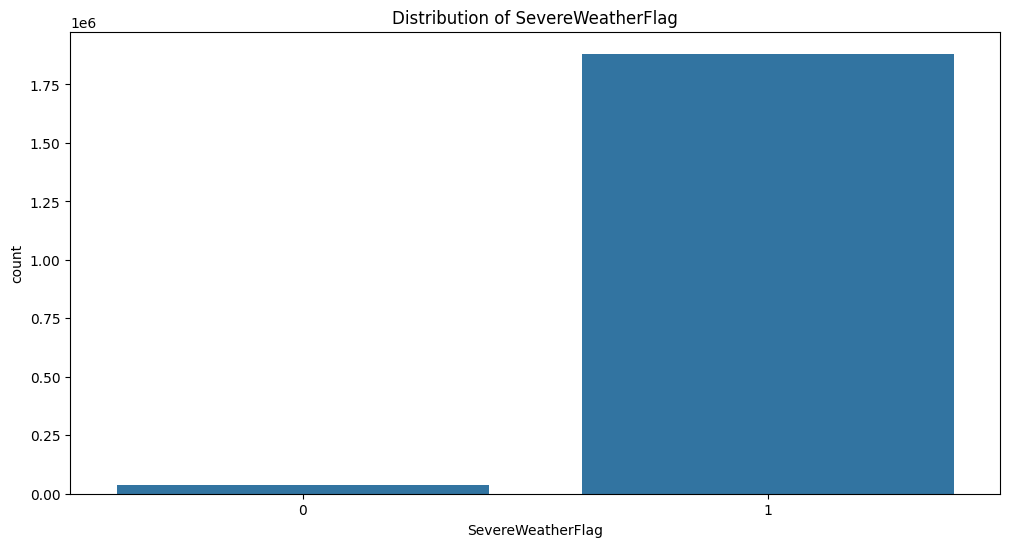

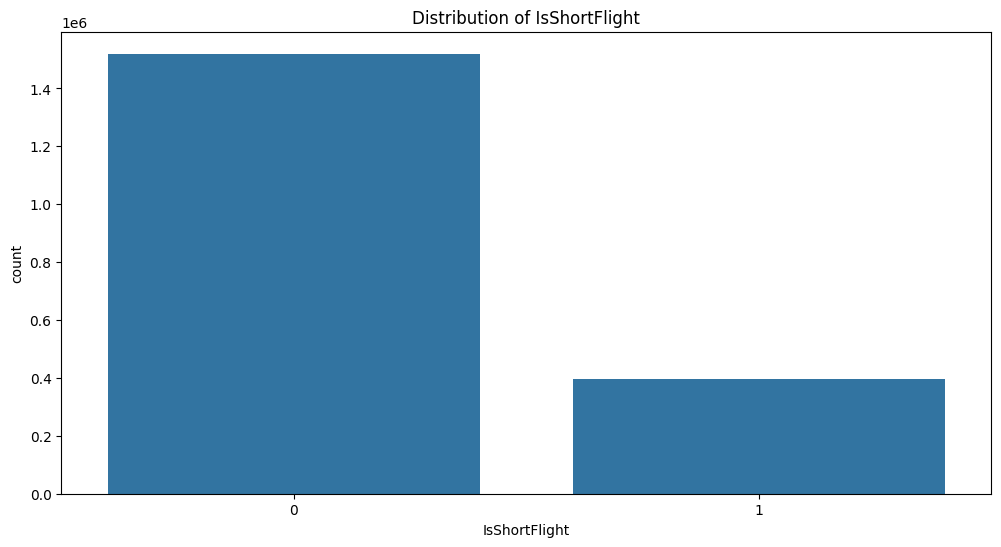

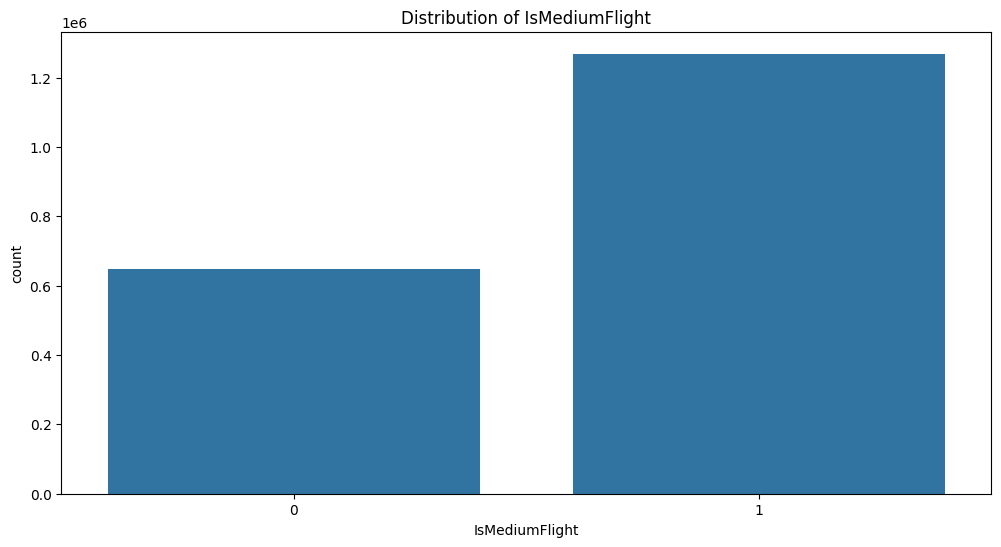

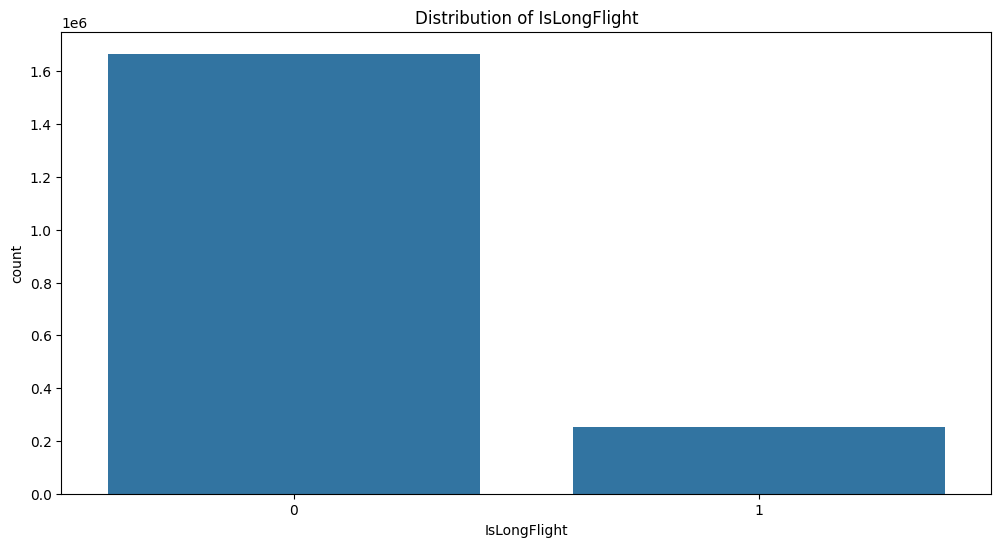

In [48]:
# Define a function to visualize categorical distributions
def plot_categorical_distribution(df, features):
    for feature in features:
        plt.figure(figsize=(12, 6))
        sns.countplot(x=df[feature])
        plt.title(f'Distribution of {feature}')
        plt.show()

# List of categorical features
categorical_features = ['Route', 'SevereWeatherFlag', 'IsShortFlight', 'IsMediumFlight', 'IsLongFlight']

plot_categorical_distribution(df, categorical_features)


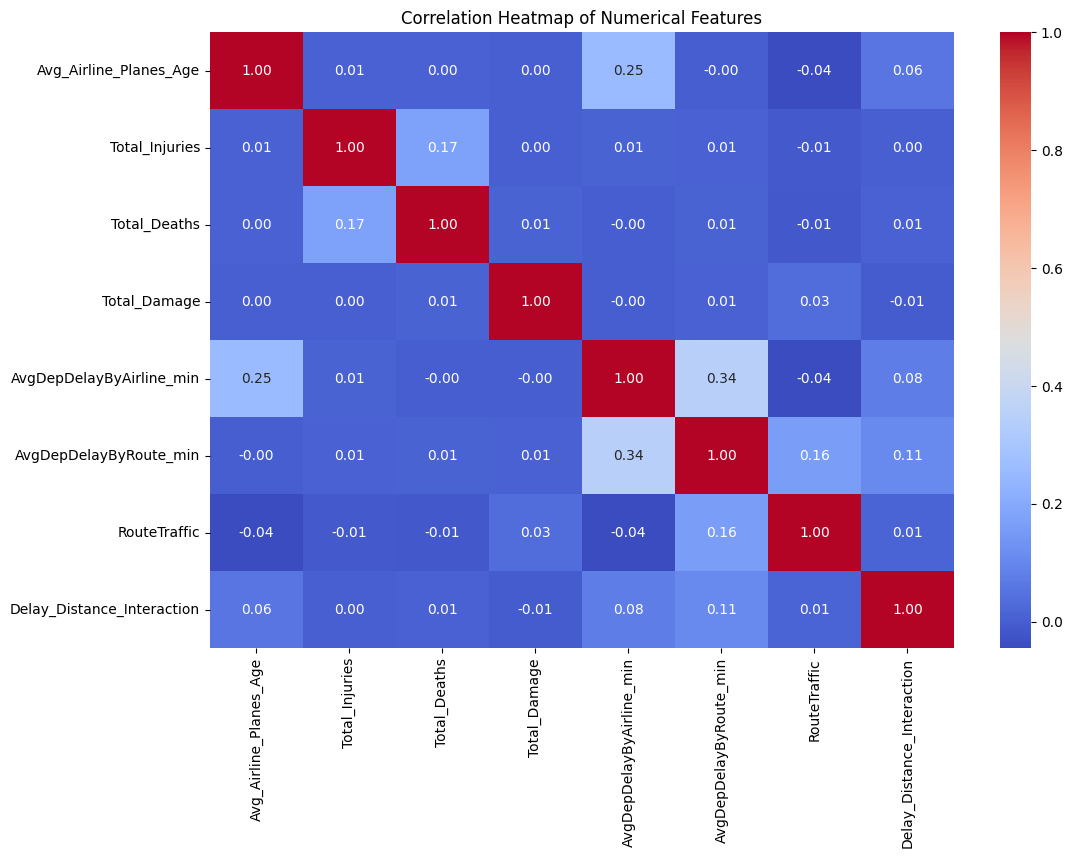

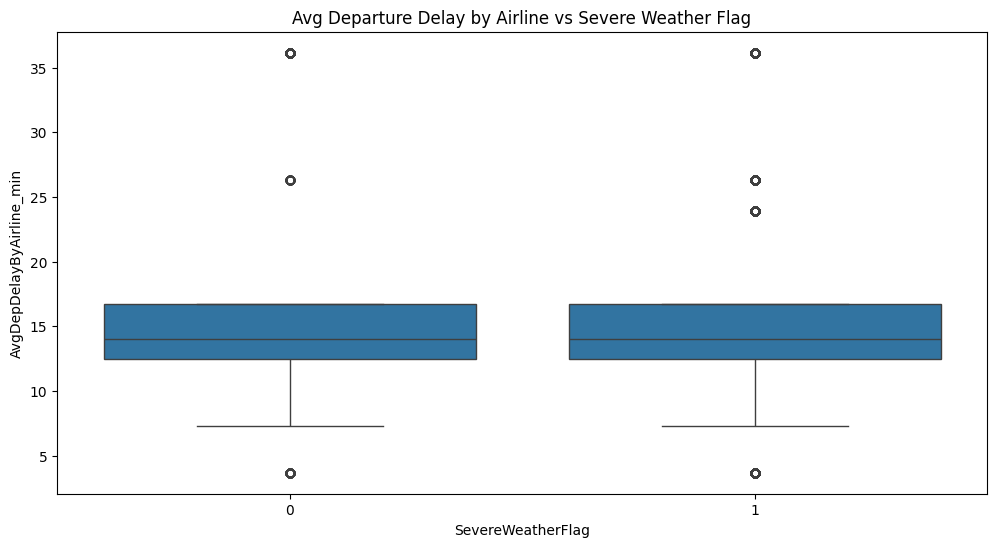

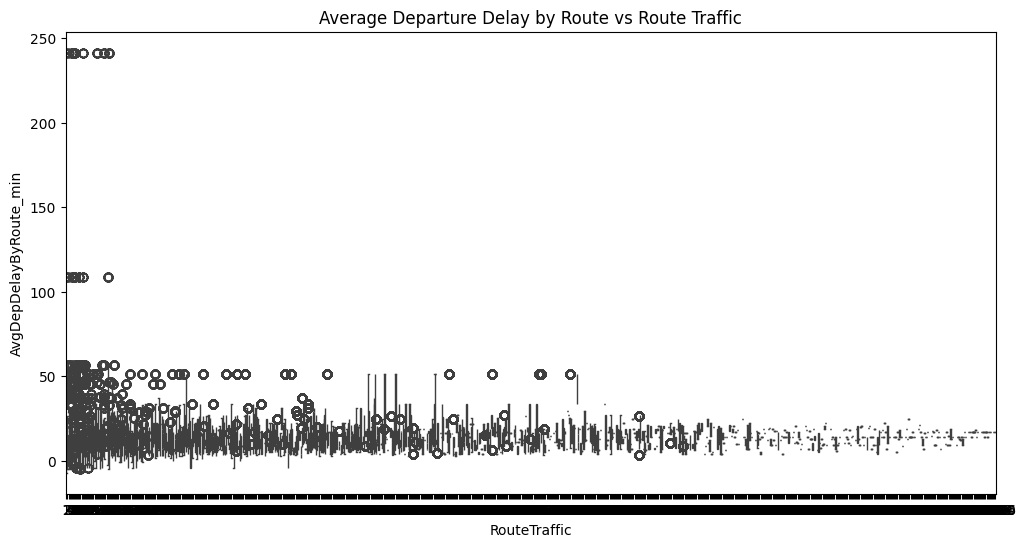

In [50]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Boxplot to check the relationship between 'SevereWeatherFlag' and numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(x='SevereWeatherFlag', y='AvgDepDelayByAirline_min', data=df)
plt.title('Avg Departure Delay by Airline vs Severe Weather Flag')
plt.show()

# Pairplot for numerical features
# sns.pairplot(df[numerical_features])
# plt.suptitle('Pairplot of Numerical Features', y=1.02)
# plt.show()

# Boxplot to check the relationship between 'RouteTraffic' and other numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(x='RouteTraffic', y='AvgDepDelayByRoute_min', data=df)
plt.title('Average Departure Delay by Route vs Route Traffic')
plt.show()


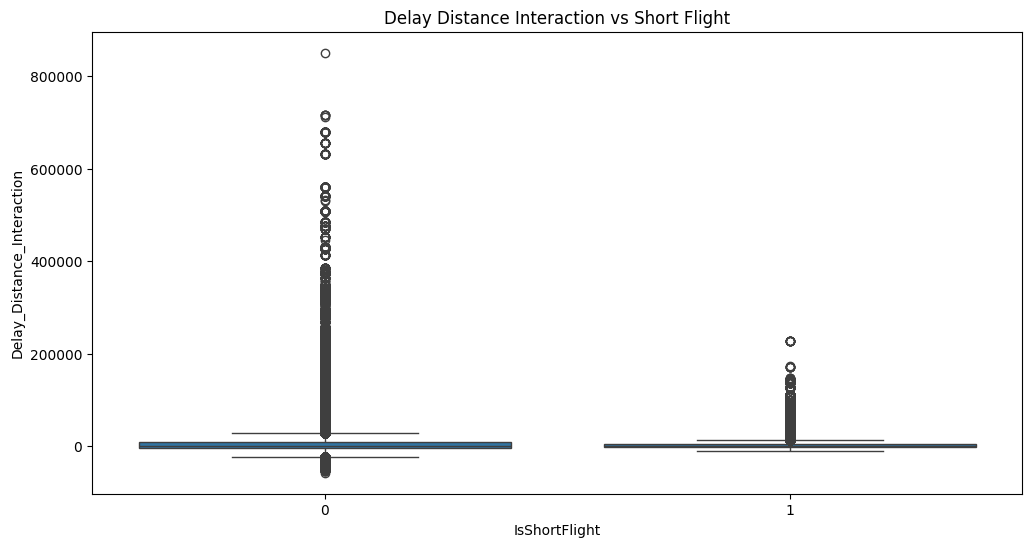

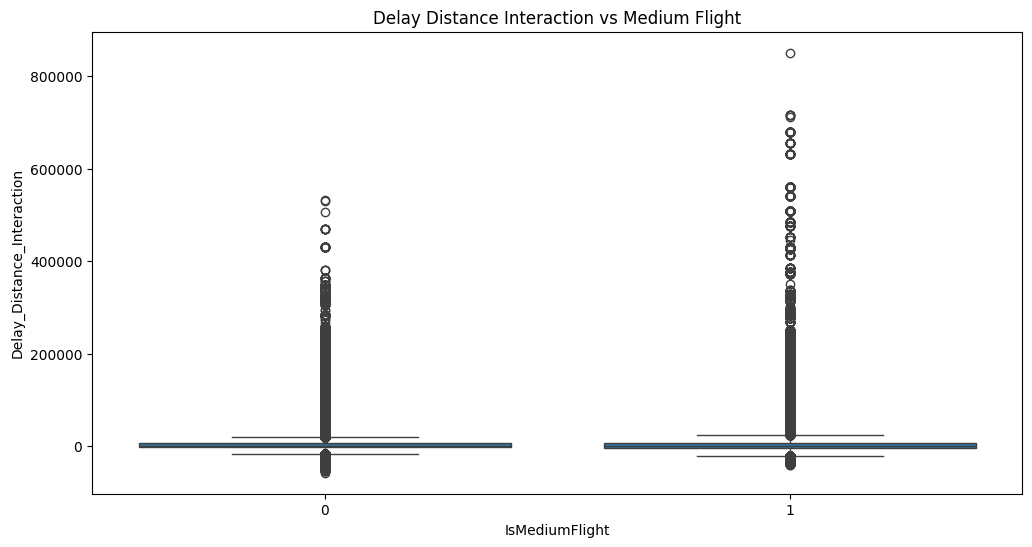

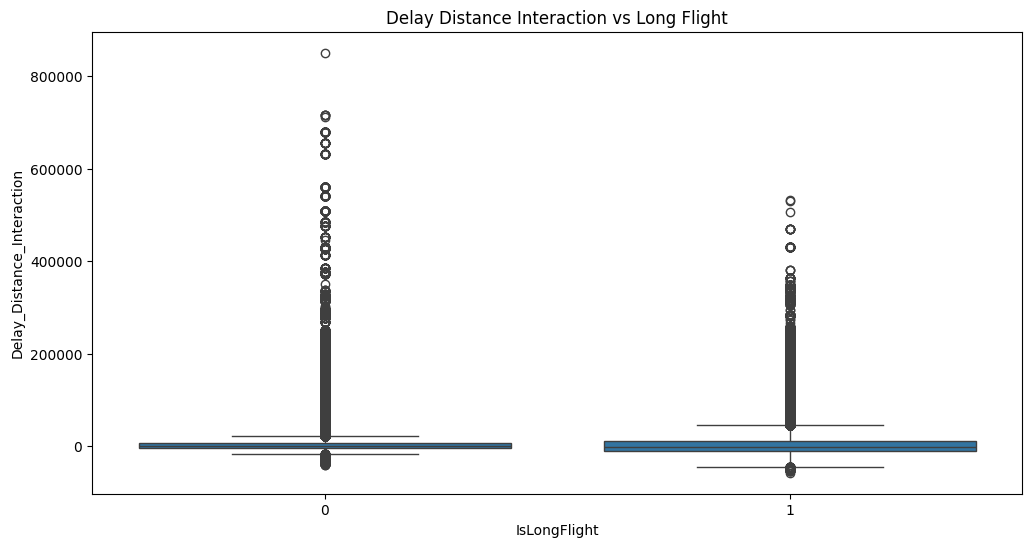

In [51]:
# Boxplot for interaction between 'Delay_Distance_Interaction' and flight types
plt.figure(figsize=(12, 6))
sns.boxplot(x='IsShortFlight', y='Delay_Distance_Interaction', data=df)
plt.title('Delay Distance Interaction vs Short Flight')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='IsMediumFlight', y='Delay_Distance_Interaction', data=df)
plt.title('Delay Distance Interaction vs Medium Flight')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='IsLongFlight', y='Delay_Distance_Interaction', data=df)
plt.title('Delay Distance Interaction vs Long Flight')
plt.show()
